In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import preprocessing
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch import optim
from torch.optim import lr_scheduler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter
from itertools import repeat
from torch.utils.data.dataset import Dataset


## Loading data into data_loader form

In [2]:
"""
This is the way Pytorch reads data, class like a container
which takes data then returns data and labels
"""
class My_dataset(Dataset):
    def __init__(self, csv_path):
        self.data_info = pd.read_csv(csv_path,header=None)
        self.data = np.asarray(self.data_info.iloc[:,1:7], dtype=np.float64)
        self.label = np.asarray(self.data_info.iloc[:,7])
        self.data_len = len(self.data_info.index)
        
    def __getitem__(self, index):
        single_row = self.data[index]
        row = torch.FloatTensor(single_row)
        target = torch.from_numpy(np.array(self.label[index]) )
        return (row, target)
    def __len__(self):
        return self.data_len

In [3]:
new_data = My_dataset('new_data/train_set.csv')
train_data = DataLoader(dataset=new_data,
                       batch_size=10,
                       shuffle=False)

new_data = My_dataset('new_data/val_set.csv')
val_data = DataLoader(dataset=new_data,
                       batch_size=5,
                       shuffle=False)

new_data = My_dataset('new_data/test_set.csv')
test_data = DataLoader(dataset=new_data,
                       batch_size=5,
                       shuffle=False)

In [4]:
for data,label in test_data:
    print data
    print label
    break

tensor([[ 0.0956,  0.1021,  0.0827,  0.0933,  0.0925,  0.4524],
        [ 0.1168,  0.0979,  0.0915,  0.1298,  0.0949,  0.3205],
        [ 0.0583,  0.1700,  0.0891,  0.1987,  0.1294,  0.3986],
        [ 0.2214,  0.2192,  0.2466,  0.2242,  0.2337,  0.2602],
        [ 0.1873,  0.1804,  0.1630,  0.1296,  0.1721,  0.4058]])
tensor([ 0.1276,  0.1953,  0.2204,  0.1274,  0.1625], dtype=torch.float64)


## LSTM class

In [5]:
class LSTM(nn.Module):
    def __init__(self, hidden_size=64, hidden_size2=128, num_securities=1, dropout=0.2, n_layers=4, T=10):

        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.hidden_size2 = hidden_size2
        self.rnn = nn.LSTM(
            input_size=num_securities,
            hidden_size=self.hidden_size,
            num_layers=n_layers,
            dropout=dropout,
            bidirectional=False
        )

        self.fc1 = nn.Linear(self.hidden_size, self.hidden_size)
        self.fc1.weight.data.normal_()
        self.fc3 = nn.Linear(self.hidden_size, 10)
        self.fc2 = nn.Linear(10, num_securities)
        self.relu = nn.ReLU()
        self.T = T

    def forward(self, x):

        batch_size = x.size()[1]
        seq_length = x.size()[0]
        x = x.view(seq_length, batch_size, -1)  # just to be sure of the dimensions
        # Initial cell states
        h0 = Variable(torch.zeros(self.rnn.num_layers, batch_size, self.hidden_size)).cuda()
        c0 = Variable(torch.zeros(self.rnn.num_layers, batch_size, self.hidden_size)).cuda()
        outputs, (ht, ct) = self.rnn(x, (h0, c0))
        out = outputs[-1]  # last prediction
        out = self.fc1(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc2(out)
        
        return out

## Run

/home/eslam/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:65: UserWarning:

invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



('Epoch = ', 0)
('Loss = ', tensor(8.5288, device='cuda:0'))


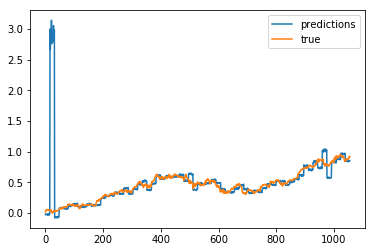

('Epoch = ', 1)
('Loss = ', tensor(1.0429, device='cuda:0'))
('Epoch = ', 2)
('Loss = ', tensor(0.9772, device='cuda:0'))
('Epoch = ', 3)
('Loss = ', tensor(0.8699, device='cuda:0'))
('Epoch = ', 4)
('Loss = ', tensor(0.7002, device='cuda:0'))
('Epoch = ', 5)
('Loss = ', tensor(0.5446, device='cuda:0'))
('Epoch = ', 6)
('Loss = ', tensor(0.4538, device='cuda:0'))
('Epoch = ', 7)
('Loss = ', tensor(0.7646, device='cuda:0'))
('Epoch = ', 8)
('Loss = ', tensor(0.3753, device='cuda:0'))
('Epoch = ', 9)
('Loss = ', tensor(0.4597, device='cuda:0'))
('Epoch = ', 10)
('Loss = ', tensor(0.5558, device='cuda:0'))
('Epoch = ', 11)
('Loss = ', tensor(0.2501, device='cuda:0'))
('Epoch = ', 12)
('Loss = ', tensor(0.3173, device='cuda:0'))
('Epoch = ', 13)
('Loss = ', tensor(0.4077, device='cuda:0'))
('Epoch = ', 14)
('Loss = ', tensor(1.0956, device='cuda:0'))
('Epoch = ', 15)
('Loss = ', tensor(1.2626, device='cuda:0'))
('Epoch = ', 16)
('Loss = ', tensor(1.3519, device='cuda:0'))
('Epoch = ', 17)


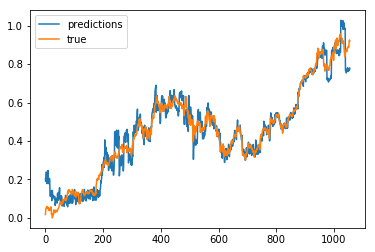

('Epoch = ', 51)
('Loss = ', tensor(0.1740, device='cuda:0'))
('Epoch = ', 52)
('Loss = ', tensor(0.1740, device='cuda:0'))
('Epoch = ', 53)
('Loss = ', tensor(0.1610, device='cuda:0'))
('Epoch = ', 54)
('Loss = ', tensor(0.1556, device='cuda:0'))
('Epoch = ', 55)
('Loss = ', tensor(0.1556, device='cuda:0'))
('Epoch = ', 56)
('Loss = ', tensor(0.1547, device='cuda:0'))
('Epoch = ', 57)
('Loss = ', tensor(0.1461, device='cuda:0'))
('Epoch = ', 58)
('Loss = ', tensor(0.1553, device='cuda:0'))
('Epoch = ', 59)
('Loss = ', tensor(0.1471, device='cuda:0'))
('Epoch = ', 60)
('Loss = ', tensor(0.1431, device='cuda:0'))
('Epoch = ', 61)
('Loss = ', tensor(0.1542, device='cuda:0'))
('Epoch = ', 62)
('Loss = ', tensor(0.1300, device='cuda:0'))
('Epoch = ', 63)
('Loss = ', tensor(0.1430, device='cuda:0'))
('Epoch = ', 64)
('Loss = ', tensor(0.1370, device='cuda:0'))
('Epoch = ', 65)
('Loss = ', tensor(0.1190, device='cuda:0'))
('Epoch = ', 66)
('Loss = ', tensor(0.1391, device='cuda:0'))
('Epoch 

'            \n#####TEST#####\npredictions = np.zeros((len(train_loader.dataset.chunks), n_stocks))\nground_tr = np.zeros((len(train_loader.dataset.chunks), n_stocks))\nbatch_size_pred = 4\n\ntest_loader = DataLoader(X_test,\n                             batch_size=batch_size_pred,\n                             shuffle=False,\n                             num_workers=4,\n                             pin_memory=True  # CUDA only\n                             )\npredictions = [[] for i in repeat(None, len(symbols))]\ngts = [[] for i in repeat(None, len(symbols))]\nk = 0\n    # Predictions\nfor batch_idx, (data, target) in enumerate(test_loader):\n        data = Variable(data.permute(1, 0, 2)).contiguous()\n        target = Variable(target.unsqueeze_(1))\n        if use_cuda:\n            data = data.cuda()\n            target = target.cuda()\n        if target.data.size()[0] == batch_size_pred:\n            output = model(data)\n            for k in range(batch_size_pred):\n             

In [6]:
use_cuda = torch.cuda.is_available()
# Parameters
learning_rate = 0.001
batch_size = 16
max_epochs = 100
n_hidden1 = 128
n_hidden2 = 128
T = 10
display_step = 50


#fn_base = "lstm_nstocks_" + str(n_stocks) + "_epochs_" + str(max_epochs) + "_T_" + str(T)

# training data

'''
train_loader = DataLoader(X_train,y_train,
             batch_size=batch_size,
             shuffle=False,
             num_workers=4,
             pin_memory=True  # CUDA only
            )'''

new_data = My_dataset('new_data/train_set.csv')
train_loader = DataLoader(dataset=new_data,
                       batch_size=batch_size,
                       shuffle=False,
                       num_workers=4,
                       pin_memory=True  # CUDA only
                       )

model = LSTM(hidden_size=n_hidden1, hidden_size2=n_hidden2, num_securities=1, dropout=0.2, n_layers=4, T=T).cuda()
optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=0.0)  # n
scheduler_model = lr_scheduler.StepLR(optimizer, step_size=1, gamma=1.0)

# loss function
criterion = nn.MSELoss(size_average=True).cuda()
# Store successive losses
losses = []
it = 0
for i in range(max_epochs):
    loss_ = 0.
    # Store current predictions
    predicted = []
    gt = []
    for data, target in train_loader:
        #target.unsqueeze_(0)
        target = target.float()
        target = target.unsqueeze_(0)
        data = Variable(data.permute(1, 0)).contiguous()
        target = Variable(target.permute(1,0))
        #print target.shape
        if use_cuda:
            data = data.cuda()
            target = target.cuda()
            
        if target.data.size()[0] == batch_size:
                # Set optimizer gradient to 0
                optimizer.zero_grad()
                # Compute predictions
                output = model(data)
                #print 'output', output
                #print 'target', target
                loss = criterion(output, target)
                loss_ += loss.data[0]
                # Backpropagation
                loss.backward()
                # Gradient descent step
                optimizer.step()
                for k in range(batch_size):
                    predicted.append(output.data[k, 0])
                    gt.append(target.data[k,0])
        it += 1
        #break
        
    print("Epoch = ", i)
    print("Loss = ", loss_)
    losses.append(loss_)
    scheduler_model.step()
        # Visual check
        # Plot current predictions
    #break
    if i % display_step == 0:
        predicted = np.array(predicted).reshape(-1, 1)
        gt = np.array(gt).reshape(-1, 1)
        x = np.array(range(predicted.shape[0]))
        plt.figure()
        plt.plot(x, predicted[:, 0], label="predictions")
        plt.plot(x, gt[:, 0], label="true")
        plt.legend()
        plt.show()
           
'''            
#####TEST#####
predictions = np.zeros((len(train_loader.dataset.chunks), n_stocks))
ground_tr = np.zeros((len(train_loader.dataset.chunks), n_stocks))
batch_size_pred = 4

test_loader = DataLoader(X_test,
                             batch_size=batch_size_pred,
                             shuffle=False,
                             num_workers=4,
                             pin_memory=True  # CUDA only
                             )
predictions = [[] for i in repeat(None, len(symbols))]
gts = [[] for i in repeat(None, len(symbols))]
k = 0
    # Predictions
for batch_idx, (data, target) in enumerate(test_loader):
        data = Variable(data.permute(1, 0, 2)).contiguous()
        target = Variable(target.unsqueeze_(1))
        if use_cuda:
            data = data.cuda()
            target = target.cuda()
        if target.data.size()[0] == batch_size_pred:
            output = model(data)
            for k in range(batch_size_pred):
                s = 0
                for stock in symbols:
                    predictions[s].append(output.data[k, s])
                    gts[s].append(target.data[k, 0, s])
                    s += 1
            k += 1
            
if len(symbols) == 1:
        pred = dtest.scaler.inverse_transform(np.array(predictions[0]).reshape((len(predictions[0]), 1)))
        gt = dtest.scaler.inverse_transform(np.array(gts[0]).reshape(len(gts[0]), 1))
if len(symbols) >= 2:
        p = np.array(predictions)
        pred = dtest.scaler.inverse_transform(np.array(predictions).transpose())
        gt = dtest.scaler.inverse_transform(np.array(gts).transpose())
# Plots for all stocks in list of symbols
x = np.array(range(pred.shape[0]))
x = [np.datetime64(start_date) + np.timedelta64(x, 'D') for x in range(0, pred.shape[0])]
x = np.array(x)
months = MonthLocator(range(1, 10), bymonthday=1, interval=1)
monthsFmt = DateFormatter("%b '%y")
s = 0
for stock in symbols:
        fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
        plt.plot(x, pred[:, s], label="predictions", color=cm.Blues(300))
        plt.plot(x, gt[:, s], label="true", color=cm.Blues(100))
        ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
        ax.xaxis.set_major_locator(months)
        ax.xaxis.set_major_formatter(monthsFmt)
        plt.title(stock)
        plt.xlabel("Time")
        plt.ylabel("Stock Price")
        plt.legend()
        fig.autofmt_xdate()
        plt.savefig(stock + "_" + fn_base + '.png')
        plt.show()
        s += 1
'''

In [101]:
fc = nn.Linear(128, 128)
fc(torch.FloatTensor(16,2,128)[-1])


tensor([[ 9.8922e+18, -1.5403e+18,  3.5415e+18,  1.4536e+19, -1.0349e+19,
         -1.0342e+19, -2.8257e+18, -6.7951e+18,  6.3535e+18, -5.2782e+18,
          1.0625e+18, -1.1546e+18, -2.4834e+18, -1.0105e+19,  4.7303e+17,
         -6.3568e+18, -1.0486e+18,  1.6319e+18,  4.1486e+18,  6.5165e+18,
          2.6757e+17,  4.3110e+18,  6.9138e+18, -3.4509e+18,  2.1217e+18,
         -1.1719e+19, -5.8876e+18,  4.9299e+17,  7.6399e+17,  4.8994e+18,
         -4.5325e+18,  1.3813e+18, -3.2900e+18, -9.3152e+18,  1.0677e+19,
          7.4735e+18, -1.9398e+17, -9.5256e+17, -2.2828e+18,  1.6390e+18,
         -6.9768e+18, -1.1001e+18, -1.6823e+18, -1.4505e+19,  4.5135e+18,
          5.1097e+18,  9.5075e+17,  1.7511e+18, -2.3556e+18, -4.2066e+18,
         -9.4787e+18,  9.3782e+18, -2.0038e+18, -5.0958e+18, -6.8008e+18,
          3.0166e+17,  4.1820e+18,  2.3359e+17, -1.3438e+19,  1.0394e+18,
          2.4459e+18, -1.6044e+18, -8.8111e+17, -3.3547e+18, -1.3995e+18,
         -4.7318e+17,  4.3216e+18,  2.

In [143]:
criterion(torch.randn(1,16), torch.randn(1,16))

tensor(3.2079)

In [173]:
plt.figure()
plt.plot(x, predicted[:, 0], label="predictions")
plt.plot(x, gt[:, 0], label="true")
plt.legend()
plt.show()

TypeError: list indices must be integers, not tuple